In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Admission%20Chance.csv')
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
y = df['Chance of Admit ']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [14]:
y = df['Chance of Admit ']
X = df.drop(['Serial No','Chance of Admit '],axis=1)

In [15]:
# split model into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=2529)

In [16]:
# select model
from sklearn.tree import DecisionTreeRegressor,plot_tree
dtr=DecisionTreeRegressor(max_depth=3, random_state=2529)

In [17]:
# train model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=2529)

In [18]:
# evaluate the model on training sample
dtr.score(X_train,y_train)

0.7738322816632399

In [19]:
# cross validate model on train sample
from sklearn.model_selection import cross_validate
cross_validate(dtr, X_train, y_train, cv=5)

{'fit_time': array([0.01004553, 0.0021131 , 0.00654745, 0.        , 0.01161289]),
 'score_time': array([0.00416946, 0.00812387, 0.00343418, 0.        , 0.        ]),
 'test_score': array([0.62738225, 0.74911799, 0.55230282, 0.8131547 , 0.7219827 ])}

In [20]:
# cross validate model on train sample
from sklearn.model_selection import cross_val_score, KFold

In [30]:
kf = KFold(n_splits= 5, shuffle = True, random_state=101)
cross_val_results = cross_val_score(dtr, X_train, y_train, cv=kf)

In [31]:
cross_val_results

array([0.59677457, 0.76864985, 0.68061504, 0.64393278, 0.57750996])

In [32]:
# accuracy
cross_val_results.mean()

0.6534964402191288

In [34]:
dtr.score(X_test,y_test)

0.7533283237506997

In [35]:
from sklearn.model_selection import cross_validate
cross_validate(dtr, X_test, y_test, cv=5)

{'fit_time': array([0.00801587, 0.        , 0.01564121, 0.0124917 , 0.        ]),
 'score_time': array([0.        , 0.        , 0.00348163, 0.00504112, 0.        ]),
 'test_score': array([0.61991849, 0.66946528, 0.75252727, 0.82580612, 0.71498005])}

In [36]:
from sklearn.model_selection import cross_val_score, KFold

In [37]:
kf = KFold(n_splits= 5, shuffle = True, random_state=101)
cross_val_results = cross_val_score(dtr, X_test, y_test, cv=kf)

In [38]:
cross_val_results

array([0.7300253 , 0.81206457, 0.56971934, 0.82729145, 0.67669681])

In [39]:
cross_val_results.mean()

0.7231594941090732

In [40]:
# model hyperparameters
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2529,
 'splitter': 'best'}

In [41]:
# hyperparameters selection
param = {'model__max_depth' : [2,3,4,5,6,7,8,9,10],
        'model__criterion' : ['squared_error', 'absolute_error'],
        'model__random_state' : [2529]}

In [42]:
# import pipeline
from sklearn.pipeline import Pipeline

In [43]:
# Define pipe line
pipe = Pipeline([('model', dtr)])

In [45]:
# grid search CV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,param,cv=5)

In [46]:
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=2529))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [2529]})

In [47]:
# train grid search
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=2529))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [2529]})

In [48]:
# find best parama
grid.best_params_

{'model__criterion': 'squared_error',
 'model__max_depth': 3,
 'model__random_state': 2529}

In [49]:
# select best estimator
best = grid.best_estimator_

In [50]:
# fit best estimator
best.fit(X_train,y_train)

Pipeline(steps=[('model',
                 DecisionTreeRegressor(max_depth=3, random_state=2529))])

In [52]:
# fit best estimator
best.fit(X_train,y_train)

Pipeline(steps=[('model',
                 DecisionTreeRegressor(max_depth=3, random_state=2529))])

In [53]:
# predict with best estimator
y_pred=best.predict(X_test)

In [54]:
# model error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [55]:
# mean absolute error
mean_absolute_error(y_test,y_pred)

0.057160452637289014

In [56]:
# mean absolute percentage error
mean_absolute_percentage_error(y_test,y_pred)

0.09720961265635472

In [58]:
best.score(X_test,y_test)

0.7533283237506997

In [59]:
best.score(X_train,y_train)

0.7738322816632399

In [63]:
# r square
r2_score(y_test,y_pred)

0.7533283237506997

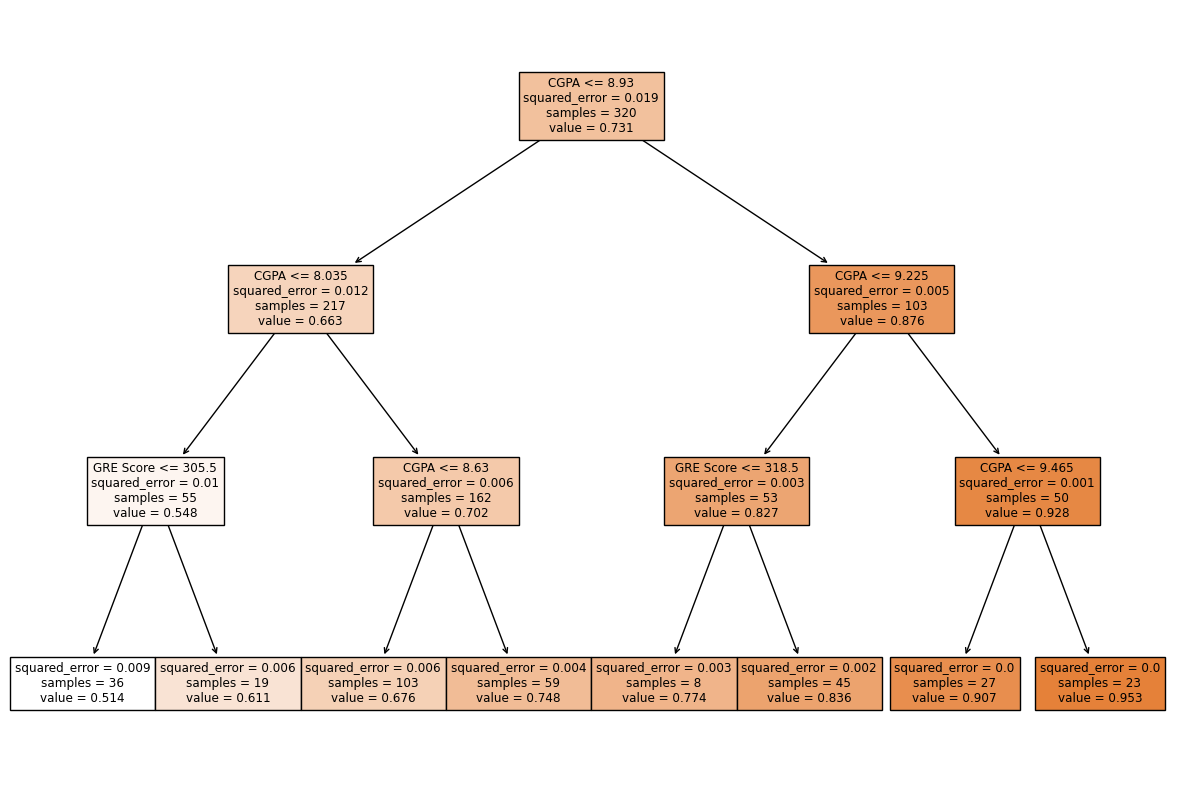

In [67]:
# plot tree
fig,ax = plt.subplots(figsize=(15,10))
final=DecisionTreeRegressor(max_depth=3, random_state=2529)
final.fit(X_train,y_train)
plot_tree(final,feature_names=X.columns.tolist(), filled=True);

In [66]:
# save model
import pickle

In [68]:
# create an iterator object with write permission - model.pickle
with open('dtr_pkl', 'wb') as files:
    pickle.dump(best, files)

In [69]:
# load saved model
with open('dtr_pkl' , 'rb') as f:
    dtr2 = pickle.load(f)

In [70]:
# predict with saved model
dtr2.predict(X_test)

array([0.67572816, 0.67572816, 0.67572816, 0.67572816, 0.51444444,
       0.90703704, 0.9526087 , 0.74779661, 0.836     , 0.67572816,
       0.61052632, 0.74779661, 0.51444444, 0.77375   , 0.836     ,
       0.67572816, 0.67572816, 0.67572816, 0.74779661, 0.836     ,
       0.61052632, 0.836     , 0.836     , 0.9526087 , 0.74779661,
       0.61052632, 0.67572816, 0.51444444, 0.51444444, 0.61052632,
       0.51444444, 0.74779661, 0.74779661, 0.74779661, 0.61052632,
       0.51444444, 0.51444444, 0.836     , 0.90703704, 0.836     ,
       0.74779661, 0.67572816, 0.67572816, 0.90703704, 0.74779661,
       0.74779661, 0.9526087 , 0.90703704, 0.61052632, 0.51444444,
       0.67572816, 0.67572816, 0.836     , 0.51444444, 0.67572816,
       0.74779661, 0.67572816, 0.67572816, 0.836     , 0.67572816,
       0.67572816, 0.9526087 , 0.67572816, 0.67572816, 0.74779661,
       0.67572816, 0.61052632, 0.9526087 , 0.61052632, 0.90703704,
       0.61052632, 0.9526087 , 0.51444444, 0.67572816, 0.51444